# KNN Classifier

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import pickle
from util import *

sns.set()

plt.rc('legend',fontsize=13)
plt.rc('axes',labelsize=15)
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

In [10]:
def knn(data_set, n_neighbors_values=(5,), p_values=(2,), training_sizes=(-1,)):
	x_train, y_train, x_test, y_test = get_data(data_set=data_set)
	n_neighbors_values = list(n_neighbors_values)
	p_values = list(p_values)
	data = []
	data_dict = {}
	for n_neighbors in n_neighbors_values:
		data_dict[n_neighbors] = {}
		for p in p_values:
			data_dict[n_neighbors][p] = {}
			for train_limit in training_sizes:
				clf = KNeighborsClassifier(
					n_neighbors=n_neighbors,
					p=p,
					weights='uniform',
					n_jobs=-1
				)
				clf.fit(X=np.array(x_train[:train_limit]), y=np.array(y_train[:train_limit]).ravel())
				score = clf.score(X=x_test, y=y_test.ravel())
				data.append((score, n_neighbors, p, train_limit))
				data_dict[n_neighbors][p][train_limit] = {'score': score}
	data_frame = pd.DataFrame(data, columns=["score", "n_neighbors", "p", "train_limit"])
	data_dict_indexes = {
		'n_neighbors': 0,
		'p': 1,
		'train_limit': 2,
		'score_type': 3
	}
	return data_frame, data_dict, data_dict_indexes

def run(data_set_name):
	if data_set_name == "gender":
		df, dd, ddi = knn(
			data_set_name,
			n_neighbors_values=range(1, 15, 1),
			p_values=range(1, 6),
			training_sizes=range(500, 2001, 500)
		)
	elif data_set_name == "creditcard":
		df, dd, ddi = knn(
			data_set_name,
			n_neighbors_values=range(1, 15, 1),
			p_values=range(1, 6),
			training_sizes=range(10000, 210001, 25000)
		)
	else:
		print("unknow dataset:", data_set_name)
		exit(1)
	if not os.path.exists("../stats"):
		os.makedirs("../stats")
	df.to_csv(path_or_buf="../stats/knn_" + data_set_name + ".csv")
	with open("../stats/knn_" + data_set_name + "_dict.pikle", 'wb') as handle:
		pickle.dump(dd, handle, protocol=pickle.HIGHEST_PROTOCOL)
	with open("../stats/knn_" + data_set_name + "_dict_indexes.pikle", 'wb') as handle:
		pickle.dump(ddi, handle, protocol=pickle.HIGHEST_PROTOCOL)

# run("gender")
# run("creditcard")

Selected data set is gender with 4989 data (train: 3750 , test: 1239 )


## Gender Dataset

In [3]:
data_set_name = "gender"
with open("../stats/knn_" + data_set_name + "_dict.pikle", 'rb') as handle:
	dds = pickle.load(handle)
with open("../stats/knn_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
	ddis = pickle.load(handle)

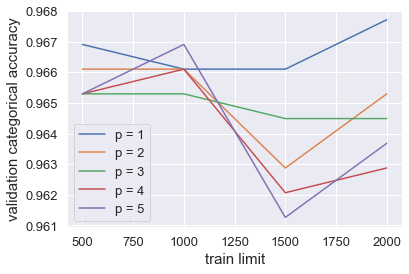

In [4]:
cd = consolidate_dict_data(
	dds, 
	consolidate_argx=ddis['train_limit'], 
	argx_name='train_limit',
	consolidate_argy=ddis['score_type'], 
	argy_name='score',
	consolidate_argz=ddis['p'],
	filters=[(ddis['n_neighbors'], 13)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get('train_limit'),d.get('median'), label='p = ' + str(a))
	plt.fill_between(d.get('train_limit'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('train limit')
plt.legend()
plt.savefig("../graphics/knn_gender_train_limit.png")
plt.show()

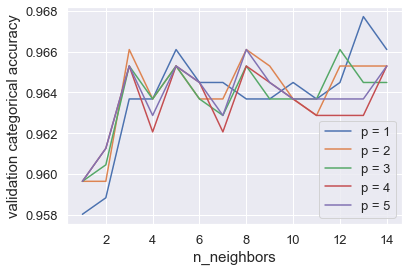

In [13]:
cd = consolidate_dict_data(
	dds, 
	consolidate_argx=ddis['n_neighbors'], 
	argx_name='n_neighbors',
	consolidate_argy=ddis['score_type'], 
	argy_name='score',
	consolidate_argz=ddis['p'],
	filters=[(ddis['train_limit'], 2000)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get('n_neighbors'),d.get('median'), label='p = ' + str(a))
	plt.fill_between(d.get('n_neighbors'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.savefig("../graphics/knn_gender_neighbors.png")
plt.show()

## Credit-Card Dataset

In [14]:
data_set_name = "creditcard"
with open("../stats/knn_" + data_set_name + "_dict.pikle", 'rb') as handle:
	dd = pickle.load(handle)
with open("../stats/knn_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
	ddi = pickle.load(handle)

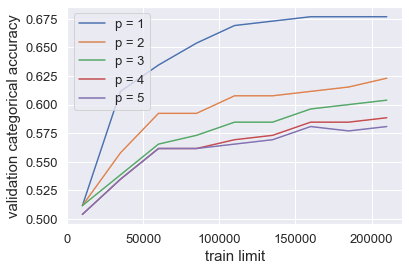

In [15]:
cd = consolidate_dict_data(
	dd, 
	consolidate_argx=ddi['train_limit'], 
	argx_name='train_limit',
	consolidate_argy=ddi['score_type'], 
	argy_name='score',
	consolidate_argz=ddi['p'],
	filters=[(ddi['n_neighbors'], 1)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get('train_limit'),d.get('median'), label='p = '+str(a))
	plt.fill_between(d.get('train_limit'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.5)
plt.ylabel('validation categorical accuracy')
plt.xlabel('train limit')
plt.legend()
plt.savefig("../graphics/knn_creditcard_train_limit.png")
plt.show()

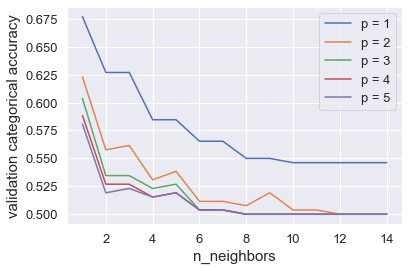

In [16]:
cd = consolidate_dict_data(
	dd, 
	consolidate_argx=ddi['n_neighbors'], 
	argx_name='n_neighbors',
	consolidate_argy=ddi['score_type'], 
	argy_name='score',
	consolidate_argz=ddi['p'],
	filters=[(ddi['train_limit'], 210000)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get('n_neighbors'),d.get('median'), label='p = ' + str(a))
	plt.fill_between(d.get('n_neighbors'), d.get('mean') - d.get('std'), d.get('mean') + d.get('std'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.savefig("../graphics/knn_creditcard_neighbors.png")
plt.show()